In [59]:
#Bibliotecas
import pandas as pd
from pandas import Series, DataFrame, Panel
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot_date, axis, show, gcf
import numpy as np
from urllib.request import Request, urlopen
import urllib
from http.cookiejar import CookieJar
import numpy as np

# Conexão com a API do Brasil.IO e manipulação e organização dos dados

In [2]:
cj = CookieJar()

In [124]:
url_Bso = "https://brasil.io/api/dataset/covid19/caso_full/data?state=MG&city=Barroso"
req_Bso = urllib.request.Request(url_Bso, None, {"User-Agent": "python-urllib"})
opener_Bso = urllib.request.build_opener(urllib.request.HTTPCookieProcessor(cj))
response_Bso = opener_Bso.open(req_Bso)
raw_response_Bso = response_Bso.read()

In [125]:
json_Bso = pd.read_json(raw_response_Bso)
results_Bso = json_Bso['results']
results_Bso = results_Bso.to_dict().values()
df_Bso = pd.DataFrame(results_Bso)
df_Bso.head(5)

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths,order_for_place,place_type,state
0,Barroso,3105905,2020-07-07,28,20810,False,True,27,129.74531,2020-07-06,0.0,0,0,0,52,city,MG
1,Barroso,3105905,2020-07-06,28,20810,True,False,27,129.74531,2020-07-06,0.0,0,12,0,51,city,MG
2,Barroso,3105905,2020-07-05,28,20810,False,False,15,72.08073,2020-07-05,0.0,0,0,0,50,city,MG
3,Barroso,3105905,2020-07-04,27,20810,False,False,15,72.08073,2020-07-04,0.0,0,1,0,49,city,MG
4,Barroso,3105905,2020-07-03,27,20810,False,False,14,67.27535,2020-07-03,0.0,0,1,0,48,city,MG


In [5]:
url_Bq = "https://brasil.io/api/dataset/covid19/caso_full/data?state=MG&city=Barbacena"
req_Bq = urllib.request.Request(url_Bq, None, {"User-Agent": "python-urllib"})
opener_Bq = urllib.request.build_opener(urllib.request.HTTPCookieProcessor(cj))
response_Bq = opener_Bq.open(req_Bq)
raw_response_Bq = response_Bq.read()

In [6]:
json_Bq = pd.read_json(raw_response_Bq)
results_Bq = json_Bq['results']
results_Bq = results_Bq.to_dict().values()
df_Bq = pd.DataFrame(results_Bq)
df_Bq.head(5)

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths,order_for_place,place_type,state
0,Barbacena,3105608,2020-07-07,28,137313,False,True,386,281.10958,2020-07-06,0.0130,5,0,0,97,city,MG
1,Barbacena,3105608,2020-07-06,28,137313,True,False,386,281.10958,2020-07-06,0.0130,5,2,0,96,city,MG
2,Barbacena,3105608,2020-07-05,28,137313,False,False,384,279.65306,2020-07-05,0.0130,5,3,0,95,city,MG
3,Barbacena,3105608,2020-07-04,27,137313,False,False,381,277.46827,2020-07-04,0.0131,5,0,0,94,city,MG
4,Barbacena,3105608,2020-07-03,27,137313,False,False,381,277.46827,2020-07-03,0.0131,5,9,0,93,city,MG


In [7]:
url_Sj = "https://brasil.io/api/dataset/covid19/caso_full/data/?state=MG&city=S%C3%A3o+Jo%C3%A3o+del+Rei"
req_Sj = urllib.request.Request(url_Sj, None, {"User-Agent": "python-urllib"})
opener_Sj = urllib.request.build_opener(urllib.request.HTTPCookieProcessor(cj))
response_Sj = opener_Sj.open(req_Sj)
raw_response_Sj = response_Sj.read()

In [8]:
json_Sj = pd.read_json(raw_response_Sj)
results_Sj = json_Sj['results']
results_Sj = results_Sj.to_dict().values()
df_Sj = pd.DataFrame(results_Sj)
df_Sj.head(5)

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths,order_for_place,place_type,state
0,São João del Rei,3162500,2020-07-07,28,90082,False,True,254,281.96532,2020-07-06,0.0197,5,0,0,104,city,MG
1,São João del Rei,3162500,2020-07-06,28,90082,True,False,254,281.96532,2020-07-06,0.0197,5,6,0,103,city,MG
2,São João del Rei,3162500,2020-07-05,28,90082,False,False,248,275.30472,2020-07-05,0.0202,5,6,0,102,city,MG
3,São João del Rei,3162500,2020-07-04,27,90082,False,False,242,268.64412,2020-07-04,0.0207,5,13,0,101,city,MG
4,São João del Rei,3162500,2020-07-03,27,90082,False,False,229,254.21283,2020-07-03,0.0218,5,10,0,100,city,MG


In [9]:
dfBso = df_Bso[['epidemiological_week', 'date','last_available_confirmed', 'last_available_confirmed_per_100k_inhabitants']]
dfBso = dfBso.groupby(['epidemiological_week']).max().reset_index()
dfBso['date'] = pd.to_datetime(dfBso.date)
dfBso['date'] = dfBso['date'].dt.strftime('%d/%m')
dfBso = dfBso.rename(columns={'last_available_confirmed':'last_available_confirmed_bso', 'last_available_confirmed_per_100k_inhabitants': 'last_available_confirmed_per_100k_inhabitants_bso'})
dfBso = pd.DataFrame(dfBso)
dfBso.tail()

,epidemiological_week,date,last_available_confirmed_bso,last_available_confirmed_per_100k_inhabitants_bso
3,24,13/06,7,33.63767
4,25,20/06,12,57.66458
5,26,27/06,13,62.46997
6,27,04/07,15,72.08073
7,28,07/07,27,129.74531


In [10]:
dfBq = df_Bq[['epidemiological_week','date','last_available_confirmed', 'last_available_confirmed_per_100k_inhabitants']]
dfBq = dfBq.groupby(['epidemiological_week']).max().reset_index()
dfBq['date'] = pd.to_datetime(dfBq.date)
dfBq['date'] = dfBq['date'].dt.strftime('%d/%m')
dfBq = dfBq.rename(columns={'last_available_confirmed':'last_available_confirmed_bq', 'last_available_confirmed_per_100k_inhabitants':'last_available_confirmed_per_100k_inhabitants_bq'})
dfBq = pd.DataFrame(dfBq)
dfBq.tail()

,epidemiological_week,date,last_available_confirmed_bq,last_available_confirmed_per_100k_inhabitants_bq
10,24,13/06,315,229.40290
11,25,20/06,321,233.77248
12,26,27/06,343,249.79427
13,27,04/07,381,277.46827
14,28,07/07,386,281.10958


In [11]:
dfSj = df_Sj[['epidemiological_week','date','last_available_confirmed', 'last_available_confirmed_per_100k_inhabitants']]
dfSj = dfSj.groupby(['epidemiological_week']).max().reset_index()
dfSj['date'] = pd.to_datetime(dfSj.date)
dfSj['date'] = dfSj['date'].dt.strftime('%d/%m')
dfSj = dfSj.rename(columns={'last_available_confirmed':'last_available_confirmed_sj', 'last_available_confirmed_per_100k_inhabitants':'last_available_confirmed_per_100k_inhabitants_sj'})
dfSj = pd.DataFrame(dfSj)
dfSj.tail()

,epidemiological_week,date,last_available_confirmed_sj,last_available_confirmed_per_100k_inhabitants_sj
11,24,13/06,89,98.79887
12,25,20/06,150,166.51495
13,26,27/06,191,212.02904
14,27,04/07,242,268.64412
15,28,07/07,254,281.96532


In [12]:
df_cidades = pd.merge(dfBq, dfBso[['date','last_available_confirmed_bso', 'last_available_confirmed_per_100k_inhabitants_bso']], on='date', how='left')
df_cidades = pd.merge(df_cidades, dfSj[['date','last_available_confirmed_sj', 'last_available_confirmed_per_100k_inhabitants_sj']], on='date', how='left')

In [13]:
df_cidades

,epidemiological_week,date,last_available_confirmed_bq,last_available_confirmed_per_100k_inhabitants_bq,last_available_confirmed_bso,last_available_confirmed_per_100k_inhabitants_bso,last_available_confirmed_sj,last_available_confirmed_per_100k_inhabitants_sj
0,14,04/04,1,0.72826,NaN,NaN,3,3.33030
1,15,11/04,2,1.45653,NaN,NaN,3,3.33030
2,16,18/04,3,2.18479,NaN,NaN,4,4.44040
3,17,25/04,5,3.64132,NaN,NaN,5,5.55050
4,18,02/05,10,7.28263,NaN,NaN,7,7.77070
5,19,09/05,17,12.38047,NaN,NaN,10,11.10100
6,20,16/05,30,21.84789,NaN,NaN,16,17.76159
7,21,23/05,42,30.58705,2.0,9.61076,21,23.31209
8,22,30/05,267,194.44627,2.0,9.61076,33,36.63329
9,23,06/06,303,220.66374,3.0,14.41615,49,54.39488


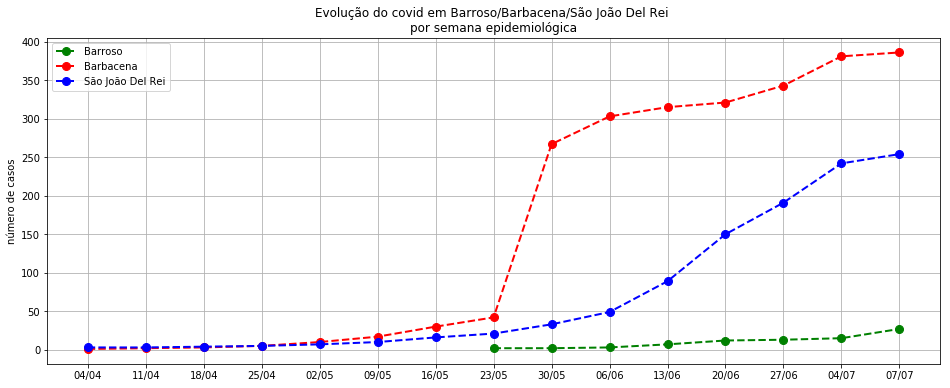

In [15]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (16,6)

ax.plot(df_cidades.date, df_cidades.last_available_confirmed_bso, 
        color='green', marker='o', linestyle='dashed', linewidth=2, 
        markersize=8)


ax.plot(df_cidades.date, df_cidades.last_available_confirmed_bq, 
        color='red', marker='o', linestyle='dashed', linewidth=2, 
        markersize=8)

ax.plot(df_cidades.date, df_cidades.last_available_confirmed_sj, 
        color='blue', marker='o', linestyle='dashed', linewidth=2, 
        markersize=8)

plt.legend(['Barroso','Barbacena', 'São João Del Rei'])

ax.set(ylabel='número de casos', xlabel='', title='Evolução do covid em Barroso/Barbacena/São João Del Rei \npor semana epidemiológica')

ax.grid()
fig.savefig('Covid.png')
plt.show()

# Séries com o número absoluto de casos confirmados

Barroso

In [130]:
Y_Bso = np.array(dfBso['last_available_confirmed_bso'])
Y_Bso = np.delete(Y_Bso, 7)
Y_Bso = np.insert(Y_Bso, 7, 44)
Y_Bso

array([ 2,  2,  3,  7, 12, 13, 15, 44])

In [131]:
X_Bso = []
for index in range(1, len(Y_Bso) + 1):
    X_Bso.append(index)
X_Bso = np.array(X_Bso)
X_Bso

array([1, 2, 3, 4, 5, 6, 7, 8])

In [132]:
X_2d_Bso = []
for index in range(0, len(X_Bso)):
    X_2d_Bso.append([X_Bso[index], Y_Bso[index]])

In [133]:
X_2d_Bso

[[1, 2], [2, 2], [3, 3], [4, 7], [5, 12], [6, 13], [7, 15], [8, 44]]

In [134]:
X_2d_Bso[0][0]

1

Barbacena

In [135]:
Y_Bq = np.array(dfBq['last_available_confirmed_bq'])
Y_Bq

array([  1,   2,   3,   5,  10,  17,  30,  42, 267, 303, 315, 321, 343,
       381, 386])

In [136]:
X_Bq = []
for index in range(1, len(Y_Bq)+1):
    X_Bq.append(index)
X_Bq = np.array(X_Bq)
X_Bq

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [137]:
X_2d_Bq = []
for index in range(0, len(X_Bq)):
    X_2d_Bq.append([X_Bq[index], Y_Bq[index]])

In [138]:
X_2d_Bq

[[1, 1],
 [2, 2],
 [3, 3],
 [4, 5],
 [5, 10],
 [6, 17],
 [7, 30],
 [8, 42],
 [9, 267],
 [10, 303],
 [11, 315],
 [12, 321],
 [13, 343],
 [14, 381],
 [15, 386]]

São João Del Rei

In [139]:
Y_Sj = np.array(dfSj['last_available_confirmed_sj'])

In [140]:
X_Sj = []
for index in range(1, len(Y_Sj)+1):
    X_Sj.append(index)
X_Sj = np.array(X_Sj)
X_Sj

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [141]:
X_2d_Sj = []
for index in range(0, len(X_Sj)):
    X_2d_Sj.append([X_Sj[index], Y_Sj[index]])

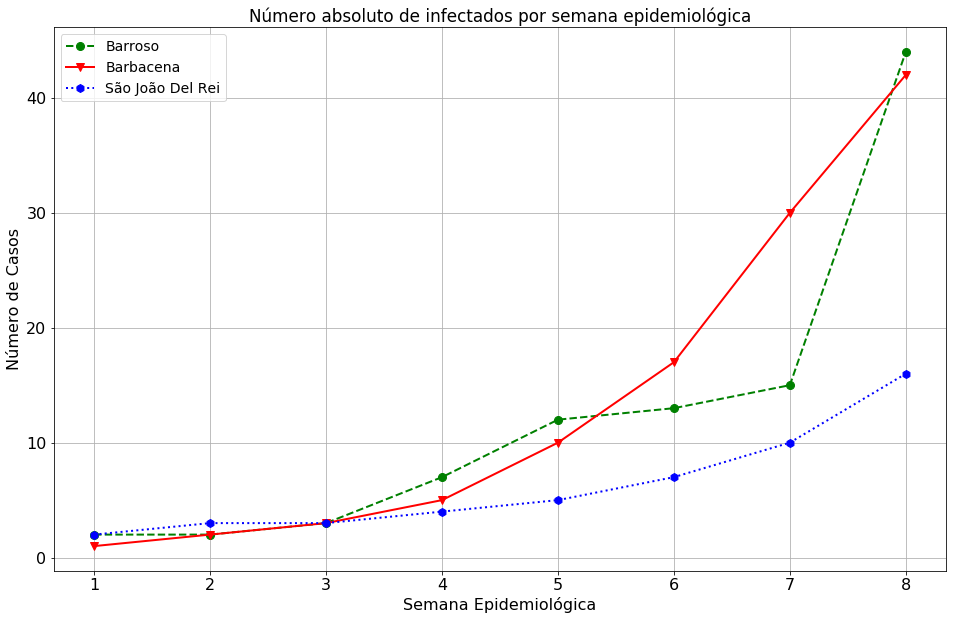

In [154]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams.update({'font.size': 14})

serieBso = np.array(X_2d_Bso)
serieBq = np.array(X_2d_Bq)
serieSj = np.array(X_2d_Sj)

serieBq = serieBq[:len(serieBso), :len(serieBso)]
serieSj = serieSj[:len(serieBso), :len(serieBso)]

plt.plot(serieBso[:, 0], serieBso[:, 1], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=8)
plt.plot(serieBq[:, 0], serieBq[:, 1], color='red', marker='v', linestyle='solid', linewidth=2, markersize=8)
plt.plot(serieSj[:, 0], serieSj[:, 1], color='blue', marker='h', linestyle='dotted', linewidth=2, markersize=8)

ax.set(ylabel='Número de Casos', xlabel='Semana Epidemiológica', title='Número absoluto de infectados por semana epidemiológica')

ax.grid()
plt.legend(['Barroso','Barbacena', 'São João Del Rei'])
fig.savefig('InfectadosXSemana.png')
plt.show()

In [144]:
serieBso

array([[ 1,  2],
       [ 2,  2],
       [ 3,  3],
       [ 4,  7],
       [ 5, 12],
       [ 6, 13],
       [ 7, 15],
       [ 8, 44]])

In [145]:
serieBq

array([[ 1,  1],
       [ 2,  2],
       [ 3,  3],
       [ 4,  5],
       [ 5, 10],
       [ 6, 17],
       [ 7, 30],
       [ 8, 42]])

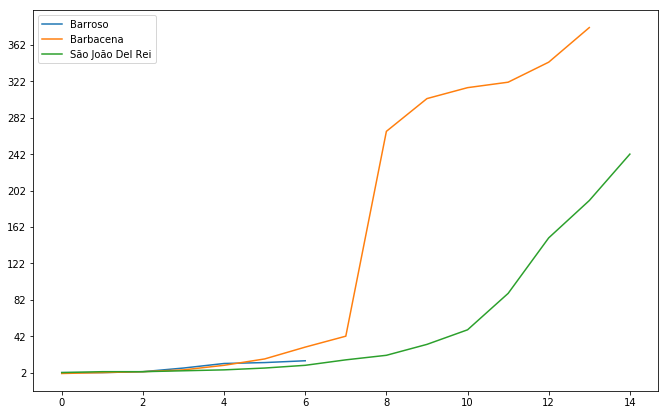

In [96]:
plt.plot(np.array(serieBso[:, 1]), label = 'Barroso')
plt.plot(np.array(serieBq[:, 1]), label = 'Barbacena')
plt.plot(np.array(serieSj[:, 1]), label = 'São João Del Rei')
sizefactor = 0.7
plt.yticks(np.arange(serieBso[:,1].min(), serieBq[:,1].max(), 40))
fig_size = plt.gcf().get_size_inches() 
plt.gcf().set_size_inches(sizefactor * fig_size)
plt.legend()
plt.show()

In [73]:
print(len(serieBso))

7


In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
Y

array([ 2,  2,  3,  7, 12, 13, 15, 27])

In [154]:
X_a

array([0, 1, 2, 3, 4, 5, 6, 7])

In [155]:
X_b

array([ 0,  2,  2,  3,  7, 12, 13, 15])

In [156]:
X_reshape = X_b.reshape(-1,1)
reg = LinearRegression().fit(X_reshape, Y)

In [157]:
reg.score(X_reshape, Y)

0.8559392104254895

In [158]:
reg.coef_

array([1.35386221])

In [159]:
reg.intercept_

0.9864300626304789

In [160]:
reg.predict(np.array([[44]]))

array([60.55636743])

In [161]:
from sklearn.linear_model import RANSACRegressor
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear', C=100, gamma='auto').fit(X_reshape, Y)

In [163]:
svr_lin.predict(np.array([[44]]))

array([46.57692308])

In [164]:
day = []
predict_lin = np.array([[44]])
for i in range(0, 5):
    result = reg.predict([predict_lin[i]])
    predict_lin = np.concatenate((predict_lin, np.array([result])))
    day.append(i)

In [167]:
predict_lin

array([[ 44.        ],
       [ 60.55636743],
       [ 82.97140768],
       [113.31828368],
       [154.40377237],
       [210.02786301]])

In [93]:
Y = np.array(dfBq['last_available_confirmed_bq'])
Y

array([  1,   2,   3,   5,  10,  17,  30,  42, 267, 303, 315, 321, 343,
       381, 386])